## Data Analysis and Feature Engineering

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('scrapped_data.csv')
reddit_stock_data = df.copy()

In [3]:
reddit_stock_data.drop('Unnamed: 0',axis=1,inplace=True)

### Sentiment Analysis

In [4]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 819.8 kB/s eta 0:00:00


We have created a function which will take text and comments column and predict the sentiment polarity and mark them as 'poistive', 'negative' or 'neutral'

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_score(text):
  analyzer = SentimentIntensityAnalyzer()
  sentiment_score = analyzer.polarity_scores(text)
  return sentiment_score['compound']

def get_overall_sentiment(text, comments):
  text_sentiment = get_sentiment_score(text)
  comments_sentiments = get_sentiment_score(comments)

  avg_sentiment = (text_sentiment + comments_sentiments) / 2

  if avg_sentiment >= 0.05:
        return 'Positive'
  elif avg_sentiment <= -0.05:
      return 'Negative'
  else:
      return 'Neutral'

In [6]:
reddit_stock_data['Sentiment'] = reddit_stock_data.apply(lambda row: get_overall_sentiment(row['text'], row['comments']), axis=1)

In [7]:
reddit_stock_data.head(5)

,Date,Volume,company,Price Movement,subreddit,text,score,num_comments,comments,Sentiment
0,2015-09-24,543502,BMWYY,Up,investing,concern spread bmw http www bloomberg com news...,224,149,well honestly car manufacturer involved practi...,Positive
1,2016-08-24,28760,BMWYY,Down,automotive,tesla model used carbon fiber plastic frame si...,2,8,30 decrease weight result increase efficiency ...,Positive
2,2017-07-28,37846,BMWYY,Up,stocks,best way buy share foreign company thinking pu...,1,3,get bmw bmwyy american market broker checked l...,Positive
3,2018-10-26,101185,BMWYY,Up,automotive,fix bmw,1,1,3m headlight restoration kit,Neutral
4,2019-03-15,101248,BMWYY,Up,investing,investing bmw bmwyy v bmw de live u want buy s...,8,3,de ticker german exchange traded germanybucks ...,Positive


lets calculate how many times a company name is mentioned in the entire data set

In [8]:
reddit_stock_data['mention_count'] = reddit_stock_data.groupby('company')['company'].transform('count')

In [9]:
reddit_stock_data.head(3)

,Date,Volume,company,Price Movement,subreddit,text,score,num_comments,comments,Sentiment,mention_count
0,2015-09-24,543502,BMWYY,Up,investing,concern spread bmw http www bloomberg com news...,224,149,well honestly car manufacturer involved practi...,Positive,35
1,2016-08-24,28760,BMWYY,Down,automotive,tesla model used carbon fiber plastic frame si...,2,8,30 decrease weight result increase efficiency ...,Positive,35
2,2017-07-28,37846,BMWYY,Up,stocks,best way buy share foreign company thinking pu...,1,3,get bmw bmwyy american market broker checked l...,Positive,35


In [10]:
reddit_stock_data['company'].value_counts()

,count
company,
F,40
TSLA,40
TM,36
BMWYY,35
LCID,33
VWAGY,33
NIO,31
RIVN,31


data look quiet balance

In [11]:
reddit_stock_data

,Date,Volume,company,Price Movement,subreddit,text,score,num_comments,comments,Sentiment,mention_count
0,2015-09-24,543502,BMWYY,Up,investing,concern spread bmw http www bloomberg com news...,224,149,well honestly car manufacturer involved practi...,Positive,35
1,2016-08-24,28760,BMWYY,Down,automotive,tesla model used carbon fiber plastic frame si...,2,8,30 decrease weight result increase efficiency ...,Positive,35
2,2017-07-28,37846,BMWYY,Up,stocks,best way buy share foreign company thinking pu...,1,3,get bmw bmwyy american market broker checked l...,Positive,35
3,2018-10-26,101185,BMWYY,Up,automotive,fix bmw,1,1,3m headlight restoration kit,Neutral,35
4,2019-03-15,101248,BMWYY,Up,investing,investing bmw bmwyy v bmw de live u want buy s...,8,3,de ticker german exchange traded germanybucks ...,Positive,35
...,...,...,...,...,...,...,...,...,...,...,...
274,2024-07-12,345700,VWAGY,Up,wallstreetbets,rivn 70 q 50 past 2 day rivn went since volksw...,24,32,user report total submission 1 first seen wsb ...,Neutral,33
275,2024-09-06,652200,VWAGY,Down,wallstreetbets,volkswagen vwagy may financial trouble help ri...,7,29,user report total submission 1 first seen wsb ...,Positive,33
276,2024-10-28,402500,VWAGY,Up,cars,volkswagen plan close least three manufacturin...,690,270,germany getting hammered ukraine russia war lo...,Positive,33
277,2024-10-30,398600,VWAGY,Up,cars,c tested 2025 volkswagen id buzz bee knee,354,286,234 mile range 70k great kia ev9 get 270 304 m...,Positive,33


In [12]:
print(reddit_stock_data['Sentiment'].value_counts())

print(reddit_stock_data['Price Movement'].value_counts())

Sentiment
Positive    220
Negative     41
Neutral      18
Name: count, dtype: int64
Price Movement
Up         142
Down       129
Neutral      8
Name: count, dtype: int64


- This shows that while sentiment is good in predicting a Up price movement it performances equally unwell in predicting Down price movement.

- We can Visualize this though a heat map

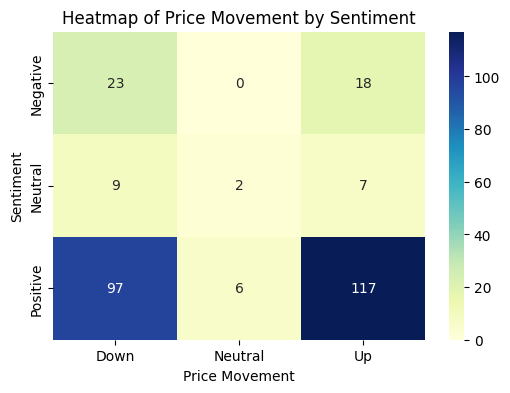

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = pd.crosstab(reddit_stock_data['Sentiment'], reddit_stock_data['Price Movement'])

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Price Movement by Sentiment')
plt.xlabel('Price Movement')
plt.ylabel('Sentiment')
plt.show()


## Now we will use this data for Model building

In [14]:
reddit_stock_data.to_csv('final_reddit_data.csv',index=False)

### Now use this "final_reddit_data.csv" as input data in "Prediction_Model.ipynb" Notebook